In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

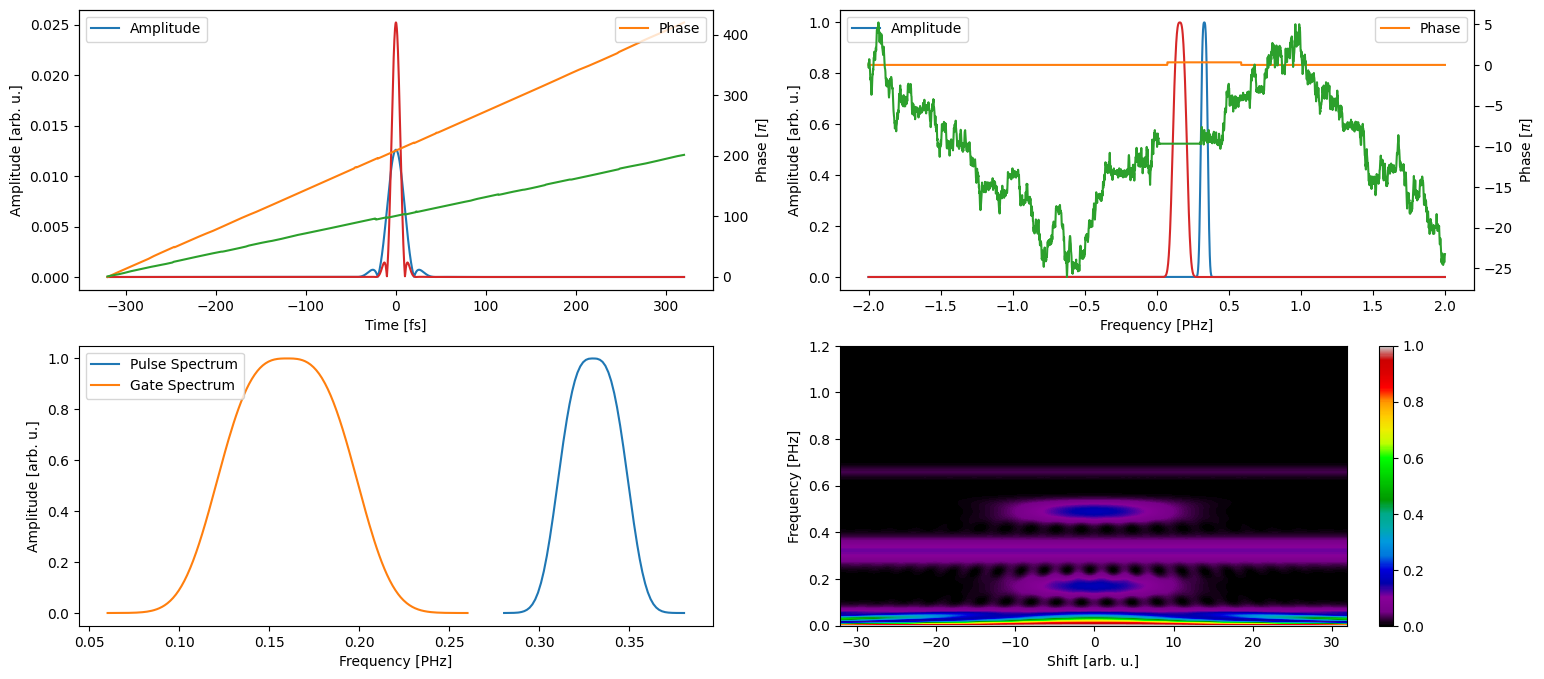

In [38]:
pulse_maker = MakeTrace(N=128*20, Delta_f=2)

phase = PolynomialPhase(None, (1,0,0,0))
amp = GaussianAmplitude((1), (0.33), (0.05), (1.5))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))


input_pulses = pulse_maker.pulses


# phase = PolynomialPhase(0.3, (0,0,30,0))
# amp = GaussianAmplitude((1,1), (0.225,0.2), (0.01,0.025), (1,1))
phase = PolynomialPhase(None, (1,0,0,0))
amp = GaussianAmplitude((1), (0.16), (0.1), (1.5))
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "2hg", cross_correlation=True, interferometric=True,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=True, interpolate_fft_conform=False,
                                                          N=128*8, scale_time_range=0.1, plot_stuff=True, cut_off_val=0.0001, frequency_range=(0,1.2))